# Stock Data, Machine Learning, and Neural Networks

In this notebook, we will be using the cleaned csv file that you obtained from the Stock_api.ipynb notebook to model the data. In this case, we will be using the GOOG.csv file to run machine learning models on. 

In this notebook, we will experiment with machine learning models to see if it can help us solve our problem statement: `How can we predict stock prices?` The machine learning models that we will be using are linear regression, random forest regressor, and Long short term memory neural network with time series data.

In [3]:
#Importing the basic modules.
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Import the cleaned dataset from our Stock_api notebook and using the date as the index
data = pd.read_csv('C:/Users/linwi/Documents/Stock_test/Cleaned_Dataset/GOOG.csv',index_col = 0)

In [5]:
#Check
data.head()

,open,high,low,close,adjusted close,volume
2024-04-01,151.650,156.990,151.65,156.50,156.50,24413368
2024-03-28,152.000,152.670,151.33,152.26,152.26,21105628
2024-03-27,152.145,152.690,150.13,151.94,151.94,16621964
2024-03-26,151.240,153.200,151.03,151.70,151.70,19312694
2024-03-25,150.950,151.456,148.80,151.15,151.15,15114728


In [6]:
#Check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8+ KB


In [7]:
#Changng the datatype of the index to date time.
data.index = pd.to_datetime(data.index)

In [8]:
#check 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


## Modeling,Visualizations, and Evaluations

### Preprocessing and Feature Engineering

Our target will be the next day's price of the stock. We will be creating new columns to help with the modeling.

In [566]:
#Create a new column for called tomorrow. This gives us the adjusted close price for the next day.
data['Tomorrow_Adj_close'] = data["adjusted close"].shift(1)

In [567]:
#Check
data

,open,high,low,close,adjusted close,volume,Tomorrow_Adj_close
2024-04-01,151.650,156.990,151.65,156.50,156.5000,24413368,NaN
2024-03-28,152.000,152.670,151.33,152.26,152.2600,21105628,156.5000
2024-03-27,152.145,152.690,150.13,151.94,151.9400,16621964,152.2600
2024-03-26,151.240,153.200,151.03,151.70,151.7000,19312694,151.9400
2024-03-25,150.950,151.456,148.80,151.15,151.1500,15114728,151.7000
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,28.3500,146700,28.4870
2014-04-01,558.710,568.450,558.71,567.16,28.3580,7900,28.3500
2014-03-31,566.890,567.000,556.93,556.97,27.8485,10800,28.3580
2014-03-28,561.200,566.430,558.67,559.99,27.9995,41100,27.8485


We will be getting rid of the `close` column as it doesn't adjust for stock splits.

In [568]:
del data['close']

Create another column called `Target` to see if `Tomorrow_Adj_close` price is greater than present day's `Close` price. We may use the target column later to predict the direction that the stock will go. But for now, we will be focused on predicting the future price of the stock.

In [569]:
#Create a new column called Target of 1(True) and 0(False) to see if tomorrow's adjusted close price is greater than today's close price.
data["Target"] = (data['Tomorrow_Adj_close'] > data["adjusted close"]).astype(int)

In [570]:
data

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-04-01,151.650,156.990,151.65,156.5000,24413368,NaN,0
2024-03-28,152.000,152.670,151.33,152.2600,21105628,156.5000,1
2024-03-27,152.145,152.690,150.13,151.9400,16621964,152.2600,1
2024-03-26,151.240,153.200,151.03,151.7000,19312694,151.9400,1
2024-03-25,150.950,151.456,148.80,151.1500,15114728,151.7000,1
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,28.3500,146700,28.4870,1
2014-04-01,558.710,568.450,558.71,28.3580,7900,28.3500,0
2014-03-31,566.890,567.000,556.93,27.8485,10800,28.3580,1
2014-03-28,561.200,566.430,558.67,27.9995,41100,27.8485,0


In [571]:
#Dropping null values
data.dropna(inplace = True)

Now that we have set up our data and did some feature engineering, we will start with modeling.

### Modeling

In [572]:
#Importing the Linear Regression Model
from sklearn.linear_model import LinearRegression #Importing the baseline linear regression model

We will be using the linear regression model as our baseline model to predict the `Tomorrow_Adj_Close` price.

In [573]:
model = LinearRegression()

#### Splitting the Data

In [574]:
from sklearn.model_selection import train_test_split
predictors = ["adjusted close", "open", "high", "volume", "low"]
#Creating the X values
X = data[predictors]  
#Creating the y values
y = data['Tomorrow_Adj_close'] 
#Splitting the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

#Reshaping y_train and y_test series to become arrays so we can input it into the model
y_test = y_test.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

The predictors are the columns that we will be using to predict the future price and target direction of the stock. Thus, we are excluding `target` and `Tomorrow_adj_close` since it has data of the future records.

**Scaling the Data**

In [575]:
from sklearn.preprocessing import MinMaxScaler
#Instantiating scaler

mm_scaler = MinMaxScaler()
#Scaling the datasets
scaled_X_train = mm_scaler.fit_transform(X_train)
scaled_X_test = mm_scaler.transform(X_test)
scaled_y_train = mm_scaler.fit_transform(y_train)
scaled_y_test =mm_scaler.transform(y_test)


#### Linear Regression

In [576]:
regression_results = model.fit(scaled_X_train,scaled_y_train)

In [577]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
#Getting the predictions of the model
predictions = model.predict(scaled_X_test)

In [578]:
predictions

array([[0.01258943],
       [0.72834815],
       [0.25779005],
       [0.39041588],
       [0.1335791 ],
       [0.87887396],
       [0.9783604 ],
       [0.30333571],
       [0.56196632],
       [0.15730722],
       [0.02179216],
       [0.73309035],
       [0.18193127],
       [0.09259644],
       [0.20391611],
       [0.18860442],
       [0.10144437],
       [0.20473857],
       [0.09933415],
       [0.85573644],
       [0.05586341],
       [0.30606174],
       [0.0892062 ],
       [0.05125332],
       [0.27461722],
       [0.24512194],
       [0.26046971],
       [0.35561584],
       [0.11128831],
       [0.82224589],
       [0.20512504],
       [0.23898922],
       [0.11598874],
       [0.23992953],
       [0.94711299],
       [0.09352844],
       [0.61801702],
       [0.20203465],
       [0.25391849],
       [0.18834431],
       [0.10853991],
       [0.28612921],
       [0.5865294 ],
       [0.68496892],
       [0.8698641 ],
       [0.30930122],
       [0.09889875],
       [0.909

In [579]:
#Getting the mean absolute error and mean squared error 
linear_mae = mean_absolute_error(scaled_y_test, predictions)
linear_mse = mean_squared_error(scaled_y_test,predictions)
linear_mape = mean_absolute_percentage_error(scaled_y_test,predictions)
print(f"The mean absolute error is {linear_mae},the mean squared error is {linear_mse} and the mean absolute percentage error is {linear_mape}.")


The mean absolute error is 0.006935074043751538,the mean squared error is 0.00012274698567926737 and the mean absolute percentage error is 0.03840392975526458.


We will be using MAPE or mean absolute percentage error as our error metric as the prices are different over the years of data. Eg. 1 dollar at 2010 and 50 dollars at 2020. By using MAPE, we are able to better compare the error metrics to other models.

In [580]:
Report = {"Model": "Linear Regression",
          "Metrics":["MAPE"],
          "Result": [linear_mape]}
Report_df = pd.DataFrame(Report)
Report_df

,Model,Metrics,Result
0,Linear Regression,MAPE,0.038404


Interpretation of Metrics

We can see that the error for the linear regression model are pretty small at 3%.

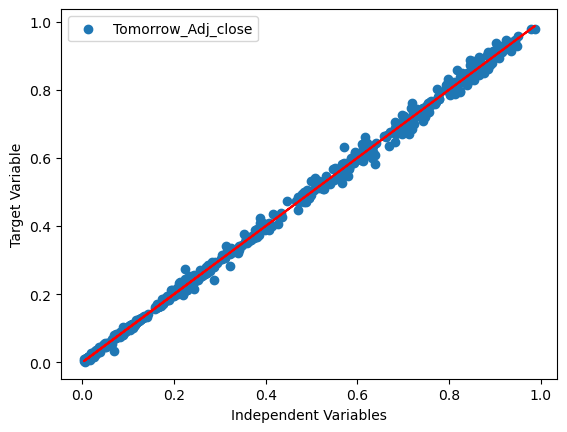

In [581]:
import matplotlib.pyplot as plt
# Plotting the predictions against the acutal values
plt.figure()
plt.scatter(x=scaled_y_test, y=predictions)
plt.legend(['Tomorrow_Adj_close'])
plt.xlabel('Independent Variables')
plt.ylabel('Target Variable')

# Convert scaled_y_test to 1D array
scaled_y_test_1d = np.ravel(scaled_y_test)

# Calculate the line of best fit
m, b = np.polyfit(scaled_y_test_1d, predictions, 1)
plt.plot(scaled_y_test_1d, m*scaled_y_test_1d + b, color='red')

plt.show()

Surprisingly, the predictions are really close to the actual values. We have to dig further and see if the model is overfitting/underfitting.

**Checking for overfitting/underfitting for the Linear Regression Model**

We will be comparing the errors for the train set and the test set to see if there is overfitting/underfitting.

In [582]:
#Importing the learning curve to compare the train and test errors
from sklearn.model_selection import learning_curve
from sklearn.metrics import get_scorer_names
get_scorer_names()#Finding all the possible scores for learning curve

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [583]:
train_sizes, train_scores, test_scores = learning_curve(
    X=X, y=y,estimator = model,cv = 5,train_sizes = np.linspace(0.1,1.0,10),random_state = 1,scoring = 'neg_mean_absolute_percentage_error')

In [584]:
#Finding the mean scores and standard deviations for both train and test sets
train_mean = abs(np.mean(train_scores, axis = 1))
train_std = np.std(train_scores, axis = 1)
test_mean =abs(np.mean(test_scores, axis = 1))
test_std = np.std(test_scores, axis = 1)



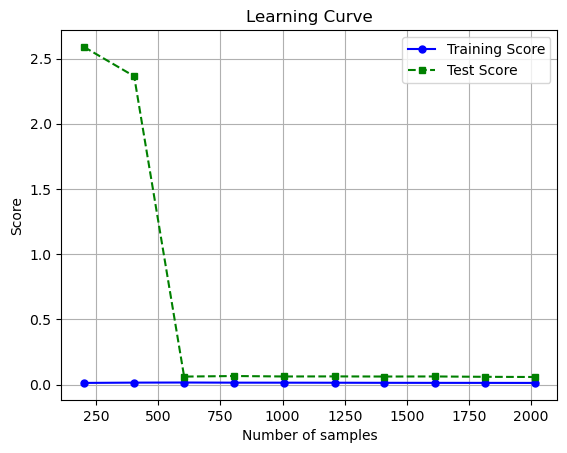

In [585]:
#Plotting the Learning Curve

#Making the graph and filling in the data
plt.figure()
plt.plot(train_sizes, train_mean, color = 'blue', marker='o', markersize =5 , label = 'Training Score')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = "Test Score")


#Labels,titles, legends
plt.title("Learning Curve")
plt.xlabel("Number of samples")
plt.ylabel("Score")
plt.grid()
plt.legend(loc ="best")
plt.show()

We can see that the training mean absolute percentage error score is close to zero across all sample sizes, while the test mean absolute percentage error score gradually decreased as the sample sizes increased. Though comparing the two, we can see that there is some overfitting as the difference between training scores and test scores and very high early on.

#### Random Forests

We will be using a random forest regressor model to help us predict the future close price for the next day.

In [612]:
from sklearn.ensemble import RandomForestRegressor
#Instantiating the model
forest_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [613]:
from sklearn.model_selection import train_test_split
predictors = ["adjusted close", "open", "high", "volume", "low"]
#Creating the X values
X = data[predictors]  
#Creating the y values
y = data['Tomorrow_Adj_close'] 
#Splitting the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

In [614]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=100, random_state=1)

In [615]:
#Getting the predictions from the forest model
forest_predictions = forest_model.predict(X_test)

In [616]:
#Turning the predictions into a series with the date index for easier interpretation
forest_predictions = pd.Series(forest_predictions,index = X_test.index)
forest_predictions

2015-07-07     26.522691
2022-08-10    126.325384
2018-09-19     58.042454
2020-09-16     72.694833
2017-03-10     43.191835
                 ...    
2014-06-12     28.025560
2023-02-27     92.910163
2021-02-09    107.118548
2023-12-14    128.672876
2019-03-12     58.447845
Length: 832, dtype: float64

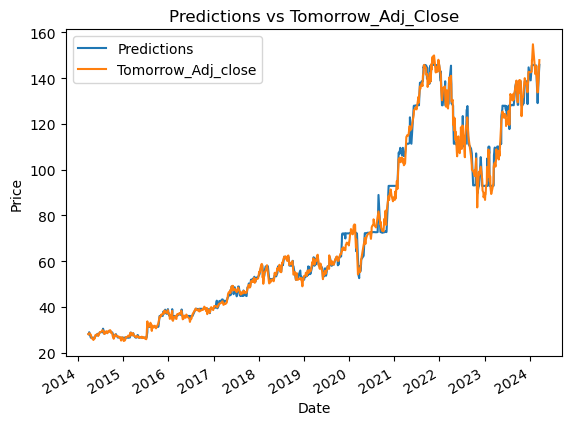

In [619]:
#Plotting the predictions and actual price values

plt.figure()
forest_predictions.plot(label = 'Predictions')
y_test.plot(label = 'Tomorrow_Adj_close')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predictions vs Tomorrow_Adj_Close')
plt.show()


In this chart, we can see that the random forest regressor model still follows the trend but there are many points where the model predictions are quite different from the actual. Thus, we will be optimizing our model later.

Obtaining the evaluation metrics for Random Forest. We will continue to use Mean Absolute Error,Mean Squared Error and Mean Absolute Percentage Error.

In [620]:
#Getting the mean absolute error and mean squared error 
forest_mae = mean_absolute_error(y_test, forest_predictions)
forest_mse = mean_squared_error(y_test,forest_predictions)
forest_mape = mean_absolute_percentage_error(y_test,forest_predictions)
print(f"The mean absolute error is {forest_mae},the mean squared error is {forest_mse} and the mean absolute percentage error is {forest_mape}.")

The mean absolute error is 1.9090886433697831,the mean squared error is 7.8776781664666835 and the mean absolute percentage error is 0.024858503537176245.


We will add the MAPE metric to the report table since that was our chosen metric to evaluate the models.

In [621]:
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor', 'MAPE', forest_mape]

In [622]:
Report_df

,Model,Metrics,Result
0,Linear Regression,MAPE,0.038404
1,Random Forest Regressor,MAPE,0.024859


We can see that the random forest regression model has a lower MAPE score(Closer to 0 is better) meaning that the model does a better job at predicting price than the linear regression model from above. This is without scaling and optimizing the hyperparameters as well. Next, we will optimize the model to see if it can pick up the noise in the dataset.

**Checking Random Forest Regressor Model with the Learning Curve**

In [623]:
#Setting up the learning curve
train_sizes, train_scores,test_scores = learning_curve(forest_model, X,y, train_sizes = np.linspace(0.1,1.0,10), cv =5,scoring = 'neg_mean_absolute_percentage_error')

In [624]:
#Fidning the means and std for the scores from the learning curve 
train_mean = abs(np.mean(train_scores, axis = 1))
train_std = np.std (train_scores, axis = 1)

test_mean = abs(np.mean(test_scores, axis = 1))
test_std = np.std(test_scores, axis = 1)

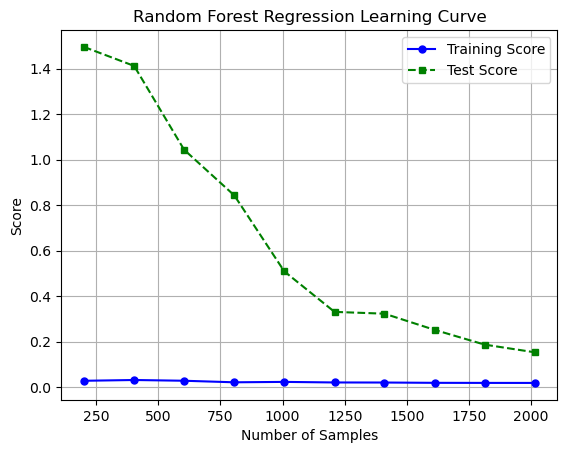

In [625]:
#Plotting the learning curve
plt.figure()
plt.title('Random Forest Regression Learning Curve')
plt.plot(train_sizes,train_mean,color = 'blue', marker ='o', markersize = 5, label = 'Training Score')
plt.plot(train_sizes, test_mean,color = 'green', linestyle = '--', marker ='s', markersize = 5,label = "Test Score")
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.grid()
plt.legend(loc = 'best')
plt.show()

Similar to the linear regression model, we can see that the training score is really close to zero while the test score is a lot higher in the early sample stages. This difference may be a sign of overfitting.

**Optimizing Random Forest Regressor Model**

In [626]:
#Importing Halving grid search cv for faster computation of parameters
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [627]:
#Creating the train and test data sets 
from sklearn.model_selection import train_test_split
predictors = ["adjusted close", "open", "high", "volume", "low"]
#Creating the X values
X = data[predictors]  
#Creating the y values
y = data['Tomorrow_Adj_close'] 
#Splitting the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

In [628]:
#Setting up the parameter grid
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

#Changing y_train back

In [629]:
halving_search = HalvingGridSearchCV(
    estimator = forest_model, param_grid = param_grid, cv = 5, scoring = 'neg_mean_absolute_percentage_error',n_jobs = -1)

halving_search.fit(X_train,y_train)

HalvingGridSearchCV(estimator=RandomForestRegressor(min_samples_split=100,
                                                    random_state=1),
                    n_jobs=-1,
                    param_grid={'max_depth': [None, 10, 20],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5, 10],
                                'n_estimators': [50, 100, 200]},
                    scoring='neg_mean_absolute_percentage_error')

In [630]:
#Printing the best parameters
print("Best Parameters:", halving_search.best_params_)
print("Best Estimators:", halving_search.best_estimator_)
print("Best Score:", halving_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimators: RandomForestRegressor(max_depth=10, random_state=1)
Best Score: -0.01368381567062239


In [631]:
opt_forest_model = RandomForestRegressor(max_depth = 10, min_samples_leaf=1, min_samples_split=2,n_estimators = 200,random_state = 1)

In [632]:
opt_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=1)

In [633]:
#Getting the predictions from the optimized forest model
opt_forest_predictions = opt_forest_model.predict(X_test)

In [634]:
#Turning the predictions into a series with the date index for easier interpretation
opt_forest_predictions = pd.Series(opt_forest_predictions,index = y_test.index)
opt_forest_predictions

2015-07-07     26.145272
2022-08-10    120.313193
2018-09-19     58.349968
2020-09-16     76.592257
2017-03-10     42.094304
                 ...    
2014-06-12     27.505252
2023-02-27     90.236513
2021-02-09    103.381139
2023-12-14    133.751337
2019-03-12     58.974184
Length: 832, dtype: float64

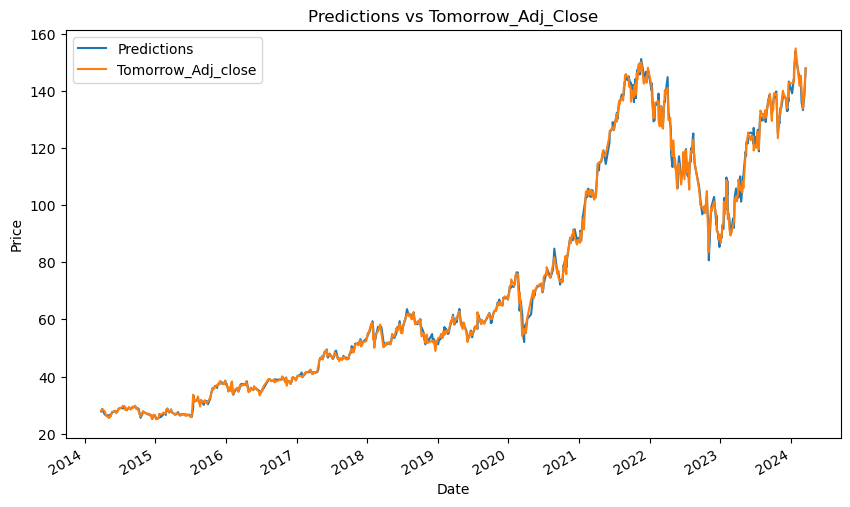

In [635]:
#Plotting the predictions and actual price values
plt.figure(figsize = (10,6))
opt_forest_predictions.plot(label = 'Predictions')
y_test.plot(label = 'Tomorrow_Adj_close')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predictions vs Tomorrow_Adj_Close')
plt.show()

From the graph, we can see that predictions follow the actual data very closely. Though, there are some points where the predictions are not 100% correct. During fast drops or spikes, we can see that there are some errors in the predictions. 

Let's add the optimized random forest regression model metrics to the report table.

In [636]:
#Getting the mean absolute error and mean squared error 
opt_forest_mae = mean_absolute_error(y_test,opt_forest_predictions)
opt_forest_mse = mean_squared_error(y_test,opt_forest_predictions)
opt_forest_mape = mean_absolute_percentage_error(y_test,opt_forest_predictions)
print(f"The mean absolute error is {opt_forest_mae},the mean squared error is {opt_forest_mse} and the mean absolute percentage error is {opt_forest_mape}.")

The mean absolute error is 1.0705641361778537,the mean squared error is 2.8748586810268058 and the mean absolute percentage error is 0.014219370217849952.


In [637]:
Report_df.loc[len(Report_df.index)] = ['Random Forest Regressor_Opt', 'MAPE', forest_mape]

#### LSTM - Neural Network

We will be using the Long Short term memory neural network to help us predict the next day's close price.We will use a lag of 10 days meaning we will use the previous 10 day's price to help train our model.

First, lets review what our dataset looks like.

In [638]:
data.head()

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-03-28,152.000,152.670,151.33,152.26,21105628,156.50,1
2024-03-27,152.145,152.690,150.13,151.94,16621964,152.26,1
2024-03-26,151.240,153.200,151.03,151.70,19312694,151.94,1
2024-03-25,150.950,151.456,148.80,151.15,15114728,151.70,1
2024-03-22,150.240,152.560,150.09,151.77,19252925,151.15,0


With the dataframe above, we will be creating a new dataframe to help us create a better LSTM model. 

In [639]:
#Creating a new copy of the dataframe
LSTM_data = data.copy()

In [640]:
#Check
LSTM_data.head(10)

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-03-28,152.000,152.670,151.3300,152.26,21105628,156.50,1
2024-03-27,152.145,152.690,150.1300,151.94,16621964,152.26,1
2024-03-26,151.240,153.200,151.0300,151.70,19312694,151.94,1
2024-03-25,150.950,151.456,148.8000,151.15,15114728,151.70,1
2024-03-22,150.240,152.560,150.0900,151.77,19252925,151.15,0
2024-03-21,150.320,151.305,148.0101,148.74,19843915,151.77,1
2024-03-20,148.790,149.760,147.6650,149.68,17729996,148.74,0
2024-03-19,148.980,149.620,147.0100,147.92,17748367,149.68,1
2024-03-18,149.370,152.930,148.1400,148.48,47676689,147.92,0
2024-03-15,143.410,144.340,141.1301,142.17,41039494,148.48,1


In [641]:
#Changing the datetime index so the most recent dates appear at the end
LSTM_data.sort_index(inplace = True, ascending = True)
LSTM_data.head()

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2014-03-27,568.000,568.00,552.92,27.9230,13100,27.9995,1
2014-03-28,561.200,566.43,558.67,27.9995,41100,27.8485,0
2014-03-31,566.890,567.00,556.93,27.8485,10800,28.3580,1
2014-04-01,558.710,568.45,558.71,28.3580,7900,28.3500,0
2014-04-02,565.106,604.83,562.19,28.3500,146700,28.4870,1


Now that we finished creating and adjusting our dataframe, we can scale our data using the MinMaxScaler. All the values will be between 0 and 1.

In [642]:
#Only retrieving the adjusted close values and creating a dataframe and turning the values into a float
data1 = LSTM_data.filter(['adjusted close']).values
dataset = data1.astype('float32')

In [643]:
#Importing the Scaler
from sklearn.preprocessing import MinMaxScaler
#Scaling the data with min max scaler
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = mm_scaler.fit_transform(dataset)
print(scaled_dataset)

[[0.02530864]
 [0.02589613]
 [0.02473648]
 ...
 [0.9758855 ]
 [0.9777287 ]
 [0.9801862 ]]


**Creating our X and y for train and test splits for the LSTM**

In [644]:
# Create the scaled training dataset
sequence_length = 60

train_data = scaled_dataset[:int(len(scaled_dataset)*0.8), :]
x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [645]:
#Reshaping for LSTM 

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Creating the LSTM Model**

In [646]:
#Importing the NN models from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

C:\Users\linwi\anaconda3\envs\timeseries\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [647]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1103
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0238
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0254
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0238
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0233
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0228
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0273
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0218
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0206
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0209
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0200
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0193
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0218
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0205
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - lo

In [648]:
# Create the testing dataset
test_data = scaled_dataset[int(len(scaled_dataset)*0.8)-sequence_length:, :]
x_test = []
y_test = scaled_dataset[int(len(scaled_dataset)*0.8):, :]

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [649]:
# Get the model's predicted price values
predictions = model.predict(x_test)
#Transforming them back to their original price values
predictions = mm_scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


C:\Users\linwi\AppData\Local\Temp\ipykernel_3124\2336807155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


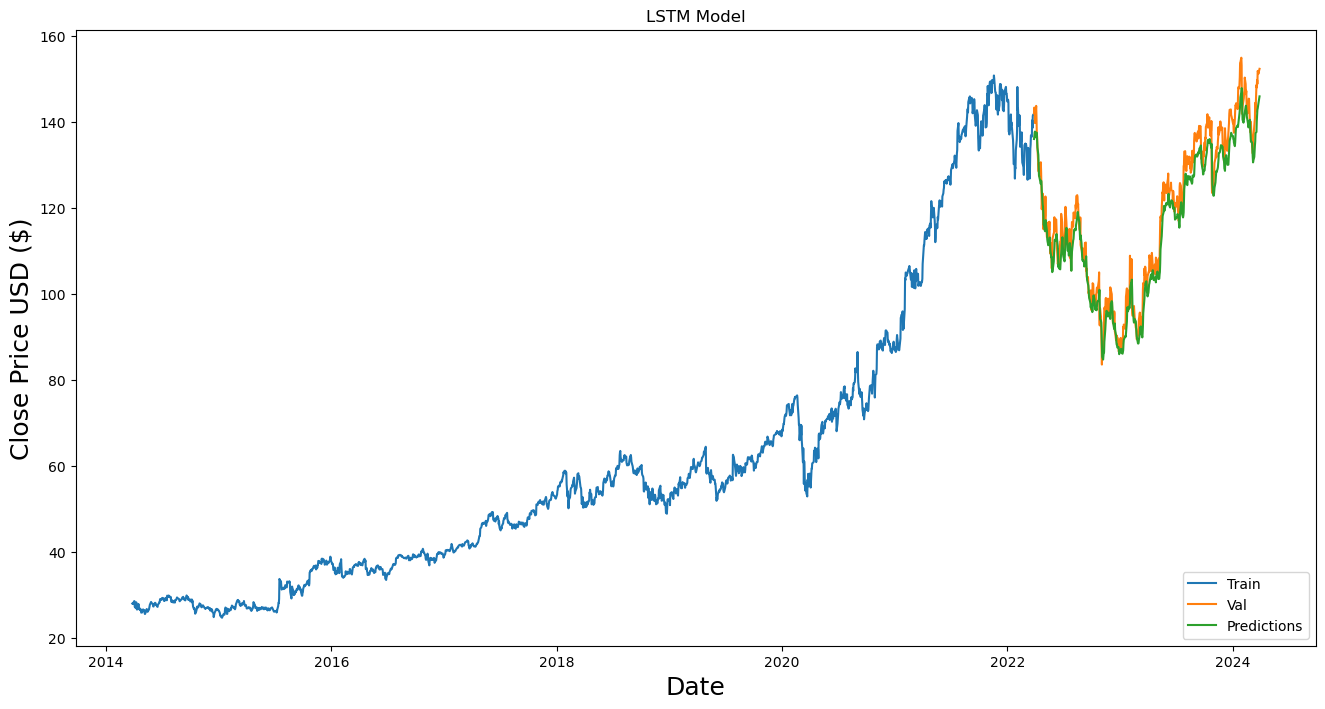

In [650]:
# Plot the data
train = LSTM_data[:int(len(dataset)*0.8)]
valid = LSTM_data[int(len(dataset)*0.8):]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['adjusted close'])
plt.plot(valid[['adjusted close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [651]:
#Getting the errors
lstm_mae = mean_absolute_error(valid['adjusted close'], predictions)
lstm_mse = mean_squared_error(valid['adjusted close'],predictions)
lstm_mape = mean_absolute_percentage_error(valid['adjusted close'],predictions)
print(f"The mean absolute error is {lstm_mae},the mean squared error is {lstm_mse} and the mean absolute percentage error is {lstm_mape}.")

The mean absolute error is 3.6760151846749443,the mean squared error is 19.245337094119762 and the mean absolute percentage error is 0.030423882811550715.


In [652]:
#Add the errors to the report
Report_df.loc[len(Report_df.index)] = ['LSTM', 'MAPE', lstm_mape]

In [653]:
Report_df

,Model,Metrics,Result
0,Linear Regression,MAPE,0.038404
1,Random Forest Regressor,MAPE,0.024859
2,Random Forest Regressor_Opt,MAPE,0.024859
3,LSTM,MAPE,0.030424


## Conclusions,Findings,Learning, and Future Iterations/Steps

Overall, from running machine learning models, it seems that we can use machine learning to help us predict stock prices, though it may not always be accurate. Generally, the model results from above tells us that we can predict the overall trend of the price but there are instances where the model misses the noise(spikes/drops). 

In future iterations, we will look into acquiring more data features for modelling, potentially using ensemble learning for the machine learning models, and trying other models.

In regards to the production and use of these models, I would like to be able to use them in trading/investing applications where trading/investing is automated.